![alt text][top-banner]

[top-banner]:./callysto-top-banner.jpg

In [5]:
import numpy as np
import pylab as plt
from IPython.display import display, Latex, clear_output, Markdown, Image, HTML, Javascript
import ipywidgets as widgets
from astropy.table import Table, Column
from ipywidgets import interact, interactive, Button , Layout
import ipywidgets as w
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import math
from ggb import *

ggb = GGB()


# Create a text box for user to input text

get_user_text = w.Textarea( value='', placeholder='Enter your text here.', description='', disabled=False , layout=Layout(width='100%', height='250px') )

# Create a slider to obtain shift integer from user 

get_user_shift = w.IntSlider( value=7, min=1, max=26, step=1, description='Ceasar Shift:', disabled=False, continuous_update=False, orientation='horizontal', readout=True, readout_format='d')

# Function: After clicking on a button prompt, the next cell is executed.

def rerun_cell(ev):
    
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1,IPython.notebook.get_selected_index()+2)'))
    button_t = w.Button(button_style='info',description="Restart") 


from IPython.display import HTML
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }
  
  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

<IPython.core.display.Javascript object>

# Represent data, using sinusoidal functions, to solve problems

*By Jessica Cervi*

![Math_Gif](https://media.giphy.com/media/l0HlOvy6nzJ0uwJry/giphy.gif)
<center>*GIF taken from https://media.giphy.com/media/l0HlOvy6nzJ0uwJry/giphy.gif, June 26th, 2018.*</center>



## Overview

>### Lesson outcomes

<ul>
    <li> Graph data and determine the sinusoidal functions, that best approximates the data. </li>
    <li> Interpret the graph of a sinusoidal function that models a situation, and explain the reasoning. </li>
</ul>


>## Introduction

In Mathematics, given a set of data points, it is possible to construct a curve, or mathematical function, that has the best fit to those series of data points. This process is called curve fitting.

In the case that the data are somewhat cyclic, it is possible to sketch a curve of best fit that somehow resembles a sinudoial function.  The fitting sinusoidal curve is found by determining the specific parameters which makes the curve match your data as closely as possible.

To better understand what we mean by ciclyc data observe the applet below. It shows a pendulum swinging. By toggling the **graph** option, you can see that its movement at the point $A$ can be modeled by the particle $A'$ travelling on a sinusoidal function which can be written as

$$f(t) = \theta_0 \cos\left(\sqrt{\frac{g}{l}}t\right)$$.

In [6]:
ggb.file('pendulum.ggb').draw();

<IPython.core.display.Javascript object>

#### Example

Suppose now we want to collect data about the height of the pendulum at different times as showed in the table below.


Time |Height
--- | ---
 1| 9.7
2 | 13.4
3 | 17
4 | 14.1
5 | 9.3
6 | 13.6
7 | 16.8
8 | 13.8
9 | 9.2
10 | 13.4

The following plot shows the data collected.

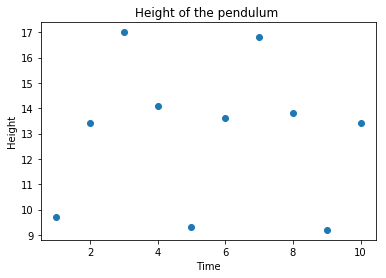

In [7]:
time = np.linspace(1,10,10)
height= np.array([9.7, 13.4, 17, 14.1, 9.3, 13.6, 16.8, 13.8, 9.2, 13.4])
plt.plot(time, height, 'o')
plt.title("Height of the pendulum ")
plt.xlabel("Time")
plt.ylabel("Height")
axes = plt.gca()
plt.show()

The graph below shows the sinusoidal function that best fit the data we have collected.

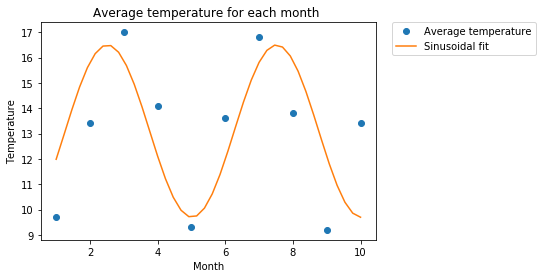

In [31]:
time = np.linspace(1,10,10)
height= np.array([9.7, 13.4, 17, 14.1, 9.3, 13.6, 16.8, 13.8, 9.2, 13.4])
x = np.linspace(1,10, 40)
y = 3.4*np.sin((2*np.pi)/5*x -1.59) + 13.1
plt.plot(time, height, 'o', label = 'Average temperature')
plt.plot(x, y, label = 'Sinusoidal fit')
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
axes = plt.gca()
plt.show()

In the next sections we will learn how to construct a sinusoidal function from a given set of data.

## The sinusoidal function

The key idea behind sinusoidal functions is that they can all be expressed as a sine function.

The general form of a sinusoidal function can be written as
$$ y = a \sin (bx-c)+d$$

We can also use the cosine function, but since $\sin(x) = \cos(\pi/2 - x)$ for every $x$, we can express every sinusoidal function using the sine function.

***

**Features of a sinuoidal function**

Each sinusoidal function can be uniquely determined by four characteristic paramenters:

<ul>
    <li>$a$ is the *amplitude*. The amplitude describes how "tall" or "short" a graph is and can be computed in the following way
        $$a = \frac{\text{maximum value} - \text{minimum value}}{2}$$ .      
   <li> $b$ is the *frequency*. The frequency describes the number of cycles that happen in $360^{\circ}$ or $2\pi$. It can be used to compute the period  $T$ as 
    $$T= \frac{360^{\circ}}{b} \quad\text{  or  } \quad T= \frac{2\pi}{b}$$ .
    <li> $d$ is the *midline* and it indicates by how much the function has been translated vertically. It can be computed as
    $$d = \frac{\text{maximum value} + \text{minimum value}}{2}$$
    If $d>0$, the graph is shifted up, otherwise it is shifted down.
        <li> $c$ is the *phase shift* and it indicates the horizontal translation that has been applied to the graph of 
    $$y=\sin(x)$$
    If $c>0$ the graph is shifted to the right, otherwise it is shifted to the left.

<ul>
    


<img src="./sine_sinusoidal.jpg" style="width: 500px;"/>

## Matching the equation of a sinusoidal function to the corresponding graph

In this section, we will learn how to describe the characteristics of a sinusoidal function by analyzing its graph.

The simplest and most basic sinusoidal function we could come across to is $$y=sin(x),$$ which graph is
<img src="./sine.jpg" style="width: 700px;"/>

We already leaned that the value of $a$ changes how tall or short the graph is. The figure below shows you different sinusoidal functions that have different amplitudes.

<img src="./amplitudes.jpg" style="width: 700px;"/>

By changing the value of $b$, we can see wheter a graph is more stretched out or not. The figure below shows you different functions with different periods.

<img src="./periods.jpg" style="width: 700px;"/>

The figure below describes how the value of $c$ translates the graph horizontally.  

<img src="./c_values.jpg" style="width: 700px;"/>

Finally, the figure below shows how $d$ moves the graph of $\sin(x)$ vertically.

<img src="./d_value.jpg" style="width: 700px;"/>

### Example

Write the equation of the sinuoidal function corresponding to the following graph

<img src="./example_sin.jpg" style="width: 700px;"/>

We start by computing the amplitude: we know that its value is given by $$a = \frac{\text{maximum value} - \text{minimum value}}{2}$$. By looking at the graph we observe that the $\text{maximum value} = 1$ and $\text{minimum value} = -5$ so $$a \frac{1 -(-5)}{2} = \frac{6}{2} = 3$$

Next we know that the value of $d$ is given by $$d = \frac{\text{maximum value} + \text{minimum value}}{2}.$$
So $$d = \frac{1 + (-5)}{2} = \frac{-4}{2} = -2.$$

Next we can compute the value of $b$. The period of the graph is 6, which can be measured from the peak at  x = 1  to the next peak at  x = 7, or from the distance between the lowest points.We know that $T= \frac{2\pi}{b}$. By inverting the previous formula we get $$ b = \frac{2\pi}{T}=\frac{2\pi}{6}=\frac{\pi}{3}$$

So so far we have $$y = 3\sin\left(\frac{\pi}{3}x -c\right) -2$$

The simplest way to compute $c$ is by substiting the coordinates of a point. We can pick for example the point with coordinate $(1,1)$. Sobstituting in our function we get

$$1 = 3\sin\left(\frac{\pi}{3} -c\right) -2$$
$$3 = 3\sin\left(\frac{\pi}{3} -c\right)$$
$$1 = \sin\left(\frac{\pi}{3} -c\right)$$
When does $\sin = 1$? For consistency, we will choose an angle between $-pi/2$ and $pi/2$. 

$$\sin\left(\frac{\pi}{2}\right)=1$$
$$\left(\frac{\pi}{3} -c\right)=\frac{\pi}{2}$$
Solve for $c$ by getting all other terms on the other side. 
 $$c =- \frac{\pi}{2} +\frac{\pi}{3}= \frac{\pi}{3}$$


So our sinusoidal function as equation

$$y = 3\sin\left(\frac{\pi}{3}x + \frac{\pi}{3}\right) -2$$

### Exercise

Given the graph below,  you are asked to find the equation of the sinusoidal function 

<img src="./sin_exercise.jpg" style="width: 700px;"/>

In [9]:
display(Latex("What is the amplitude of the function in the graph ?"))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

<IPython.core.display.Javascript object>

In [11]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '2'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
    
        display(Markdown("#### The amplitude is \n $2$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The amplitude is \n $2$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))
        

#### Your answer is correct.

#### The amplitude is 
 $2$.

In [12]:
display(Latex("What is the vertical translation of the sinusoidal function ?"))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

<IPython.core.display.Javascript object>

In [14]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '2'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
    
        display(Markdown("#### The vertical translation is \n $2$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The vertical translation is \n $2$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))
        

#### Your answer is correct.

#### The vertical translation is 
 $2$.

In [15]:
display(Latex("What is the frequency of the sinusoidal function ?"))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

<IPython.core.display.Javascript object>

In [17]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = 'pi/2'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
    
        display(Markdown("#### The frequncy is \n $\pi/2$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The frequency is \n $pi/2$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))

#### Your answer is correct.

#### The frequency is 
 $pi/2$.

In [18]:
display(Latex("What is the horizontal translation of the sinusoidal function ?"))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [19]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = 'pi/4'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
    
        display(Markdown("#### The horizontal translation is \n $pi/4$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The horizontal translation is \n $\pi/4$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))

# Please try again.

In this lesson we will only be looking at **sinusoidal functions**.

Use the activity below to understand wheter you are dealing of not with the equation of a *sinusoidal* function

In [20]:
def lin_or_non(val):
    if val == "Yes":
        display(Latex("Correct!"))
        #display(Latex("This equation has no exponent on either variable, and is therefore linear."))
    elif val == "No":
        display(Latex("Try Again!"))

display(Latex("Is this the equation of a sinusoidal function?"))
display(Latex('$$y = 12\cos(\pi x +3.45) -3$$'))
    
interact(lin_or_non, val = widgets.Dropdown(options=[' ', 'Yes', 'No'],value = ' ',description = 'Choose One:',disabled = False));



<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

interactive(children=(Dropdown(description='Choose One:', options=(' ', 'Yes', 'No'), value=' '), Output()), _dom_classes=('widget-interact',))

***

**Determine the characteristics parameters of a sinuoidal function**

In the next example, we will learn how to compute the characteristic parameters given the equation of a sinusoidal function

Determine the characteristics parameters from the following equation
$$y = 5\sin(3x) +2$$

<ul>
    <li>$a$ = 5 so the amplitude is 5
     <li>$b$ = 3 so the period $T$ is $\frac{2\pi}{3}$
     <li>$c$  = 0 so there is no horizontal translation
     <li>$d$ = 2 so the midline is at$y = 2$
<ul>


> ## Exercise: Finding the characteristic parameters of a sinusoidal function

Determine the characteristics parameters from the following equation

$$y = 14.1\sin(4.2x+3.4)+2$$


In [21]:
display(Latex("What is the amplitude of the given sinusoidal function?"))


#value = display(widgets.Text(value='',placeholder='Type something',description='Amplitude =:',disabled=False))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [22]:


# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '14.1'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### The amplitude is \n $14.1$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The amplitude is \n $14.1$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))
        

# Please try again.

In [23]:
display(Latex("What is the value of the frequency in the given sinusoidal function?"))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)




<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [24]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '4.2'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### The frequency is \n $4.2$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The frequency is \n $4.2$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))

# Please try again.

In [25]:
display(Latex("By how much is the given sinusoidal function translated horizontally ?"))


attempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [26]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '3.4'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### The given sinusoidal function is translated horizontally by \n $3.4$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The given sinusoidal function is translated horizontally by \n $3.4$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))

# Please try again.

In [27]:
display(Latex("What is the equation of the midline in the given sinusoidal function?"))



dattempts = 0
exercise_1 = w.Text( placeholder='Your answer', description='', disabled=False )
display(exercise_1)

button_exercise_1 = w.Button(button_style='info',description="Enter", layout=Layout(width='15%', height='30px') )
button_exercise_1.on_click(rerun_cell)
display(button_exercise_1)

<IPython.core.display.Latex object>

Text(value='', placeholder='Your answer')

Button(button_style='info', description='Enter', layout=Layout(height='30px', width='15%'), style=ButtonStyle())

In [28]:
# Exercise 1 user answer handling

user_answer = exercise_1.value
expected_answer = '2'


    
# Close the option to keep attempting the answer 
    
if(attempts >= 3):
        
        exercise_1.close()
        button_exercise_1.close()
        
        display(Markdown("#### The midline of given sinusoidal function is at y= \n $2$."))

        
    # If answer is correct, display appropriate markdown cells
    
if(user_answer == expected_answer):
        
        display(Markdown("#### Your answer is correct."))
        display(Markdown("#### The midline of given sinusoidal function is at y= \n $2$."))
        
        exercise_1.close()
        button_exercise_1.close()
        
else:
        
        attempts += 1
        
        if(attempts < 3):
            display(Markdown("# Please try again."))

# Please try again.

## Example: Finding a Sinusoidal Functions from Temperature Data

Let's assume that we have some data representing the average temperate for each month:

Month | Average Temperature
--- | ---
 1| 9.7
2 | 13.4
3 | 17
4 | 22.2
5 | 27.2
6 | 32.9
7 | 36.5
8 | 38.4
9 | 32.9
10 | 24.4
11 | 19
12 | 11

The data is presented in the graph below

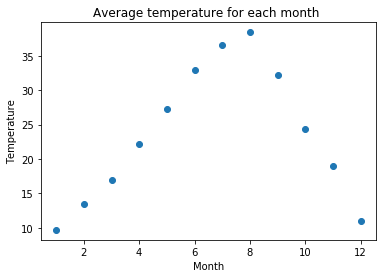

In [29]:
month = np.linspace(1,12,12)
temperature= np.array([9.7, 13.4, 17, 22.2, 27.2, 32.9, 36.5, 38.4, 32.2, 24.4, 19, 11])
plt.plot(month, temperature, 'o')
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
axes = plt.gca()
plt.show()

We want to fit this data to a sinusoidal function $ y = a \sin (bx-c)+d$.

First of all, we need to determine the *amplitude* $a$

$$a = \frac{\text{maximum value} - \text{minimum value}}{2} = \frac{38.4-9.7}{2} =14.35$$

Next, we determine the value of the midline $d$

$$d = \frac{\text{maximum value} + \text{minimum value}}{2} = \frac{38.4+9.7}{2} =24.05$$

For this exercise, the frequency $b$ be computed in the following way. The  average temperature cycle will  repeat itself every year, so period $T = 12$ months. Therefore $b$ can be computed by inverting the formula for the period $T$:

$$b = \frac{2\pi}{T} = \frac{2\pi}{12} =0.52$$

Using $a=14.35$, $b = 0.52$, and $d = 24.05$, determine horizontal shift by choosing an arbitrary data point (x,y) from the given table and solving the equation 

$$y = 14.35 \sin (0.52x-c)+24.05$$
for $c$.

Let’s choose the first data point, x = 1 (January), y = 9.7

$$9.7 = 14.35 \sin (0.52(1)-c)+24.05$$

$$-14.35.7 = 14.35 \sin (0.52-c)$$

$$-1 =  \sin (0.52-c)$$


When does $\sin = -1$? For consistency, we will choose an angle between $-pi/2$ and $pi/2$. 

$$\sin\left(-\frac{\pi}{2}\right)=-1$$
$${0.52 -c}=-\frac{\pi}{2}$$
Solve for $c$ by getting all other terms on the other side. 
 $$c = \frac{\pi}{2} + 0.52 = 2.09$$

So the sinusoidal function that fits the data is

$$y = 14.35 \sin (0.52x-2.09)+24.05$$

and its graph is shown below.

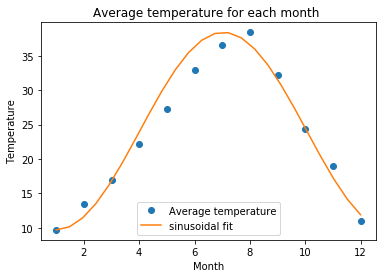

In [30]:
month = np.linspace(1,12,12)
temperature= np.array([9.7, 13.4, 17, 22.2, 27.2, 32.9, 36.5, 38.4, 32.2, 24.4, 19, 11])
x = np.linspace(1,12, 24)
y = 14.35*np.sin(0.52*x -2.09) + 24.05
plt.plot(month, temperature, 'o', x, y)
plt.title("Average temperature for each month ")
plt.xlabel("Month")
plt.ylabel("Temperature")
plt.legend(('Average temperature', 'sinusoidal fit'))
axes = plt.gca()
plt.show()

### Exercises

1)Tom boards the Ferris wheel at the Pacific Exhbition. When the ride begins, his position can be modeled by $$x = 43\sin(3.5t-0.9)+47$$

How longdoea it take to the Ferris wheel to complete one revolution (period)?

What is the amplitude of the given function?

### Conclusions

<ul>
    <li> Cyclic data can be fit by a sinusoidal curve
     <li> A sunosoidal curve is uniquely defined by characteristic paramenters
     <li>The parameters are the amplitude, the frequency and  the horizontal and vertical translations 

![alt text][bottom-banner]

[bottom-banner]: ./callysto-bottom-banner.jpg